<img src = 'red-white-wine-into-glasses.webp'>

# Wine Data Analysis

The document objective's is to demonstrate some tools and techniques about Exploratory Data Analysis.

## The Dataset

The Wine Quality dataset contains information about various physicochemical propreties of wines. The entire dataset is grouped into two categories: red wine and white wine. We'll make data analysis to disclose what is inside it.

In [44]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mn
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline

In [4]:
#loading datasets
df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                     delimiter=";")

df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                     delimiter=";")

In [5]:
#check
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#check
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


We have two dataframes (to white and another to red wines). The columns are same in both datsets. 

Lets check the columns dictionary.

- **Fixed acidity**: It indicates the amount of tartaric acid in wine and is measured in g/dm3.
- **Volatile acidity**: It indicates the amount of acetic acid in the wine. It is measured in g/dm3.
- **Citric acid**: It indicates the amount of citric acid in the wine. It is also measured in g/dm3.
- **Residual sugar**: It indicates the amount of sugar left in the wine after the fermentation process is done. It is also measured in g/dm3.
- **Free sulfur dioxide**: It measures the amount of sulfur dioxide (SO2) in free form. It is also measured in g/dm3.
- **Total sulfur dioxide**: It measures the total amount of SO2 in the wine. This chemical works as an antioxidant and antimicrobial agent.
- **Density**: It indicates the density of the wine and is measured in g/dm3.
- **pH**: It indicates the pH value of the wine. The range of value is between 0 to 14.0, which indicates very high acidity, and 14 indicates basic acidity.
- **Sulphates**: It indicates the amount of potassium sulphate in the wine. It is also measured in g/dm3.
- **Alcohol**: It indicates the alcohol content in the wine.
- **Quality**: It indicates the quality of the wine. Range of 0 to 10.

## Descriptive Statistics

**1 - Columns datatypes**

In [7]:
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**2 - Dataframe size**

In [13]:
print('The Red Wine dataset has %s rows and %s columns.' % (df_red.shape[0], df_red.shape[1]))
print('The White Wine dataset has %s rows and %s columns.' % (df_white.shape[0], df_white.shape[1]))      

The Red Wine dataset has 1599 rows and 12 columns.
The White Wine dataset has 4898 rows and 12 columns.


**3 - Descritptive Statistics information**

In [15]:
#red
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
#white
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Data Wrangling

**Null values**

<AxesSubplot:>

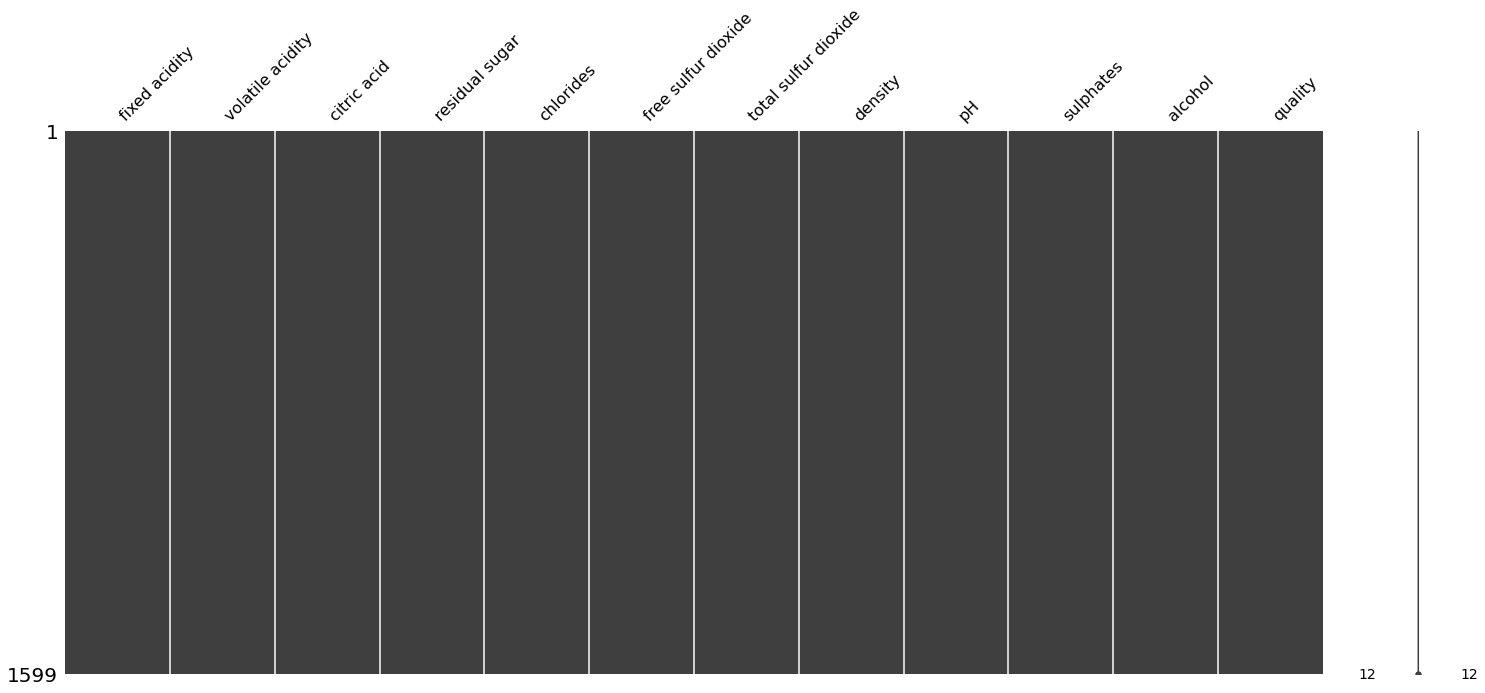

In [20]:
#red
mn.matrix(df_red)

<AxesSubplot:>

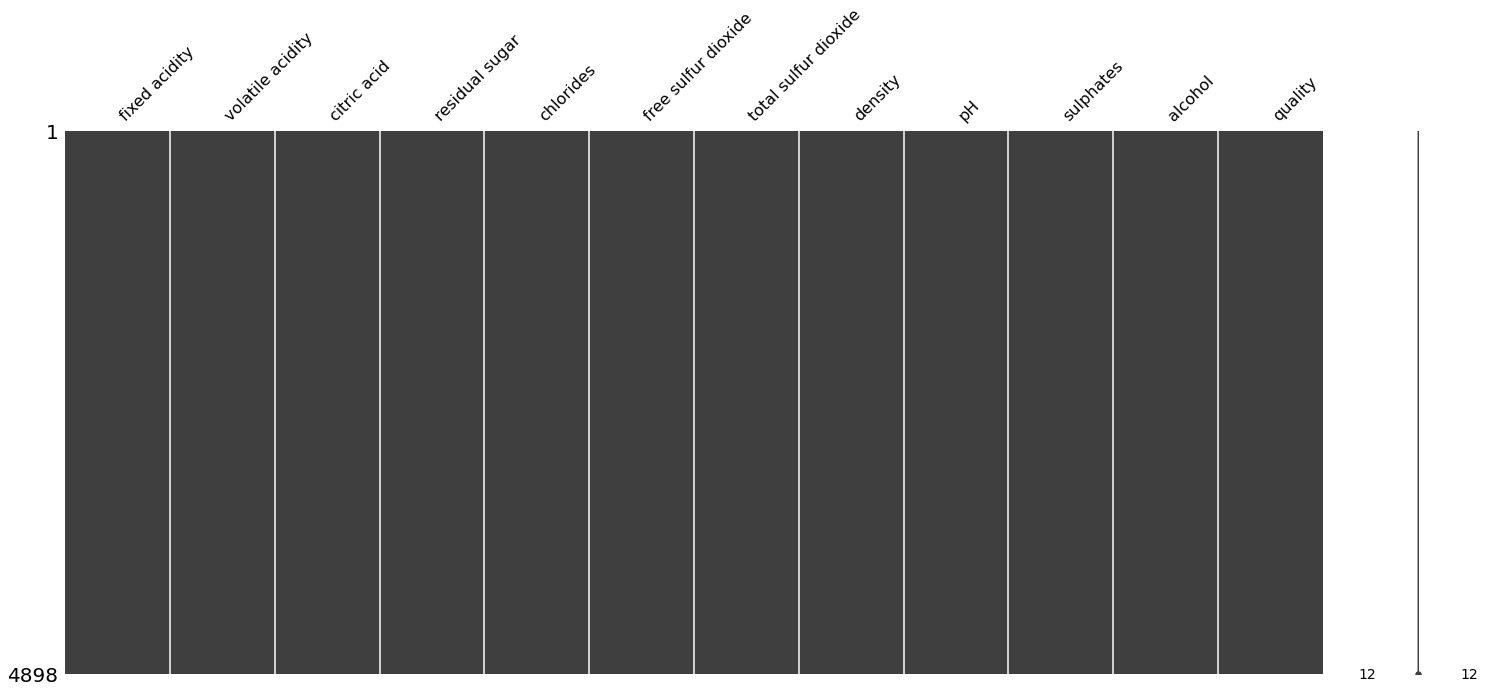

In [21]:
#white
mn.matrix(df_white)

The output show us that both dataframes has not null values.

**another way to check null values:**

In [23]:
#red
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [24]:
#white
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Analyzing red wine

Let's first check the quality of wine distribution.

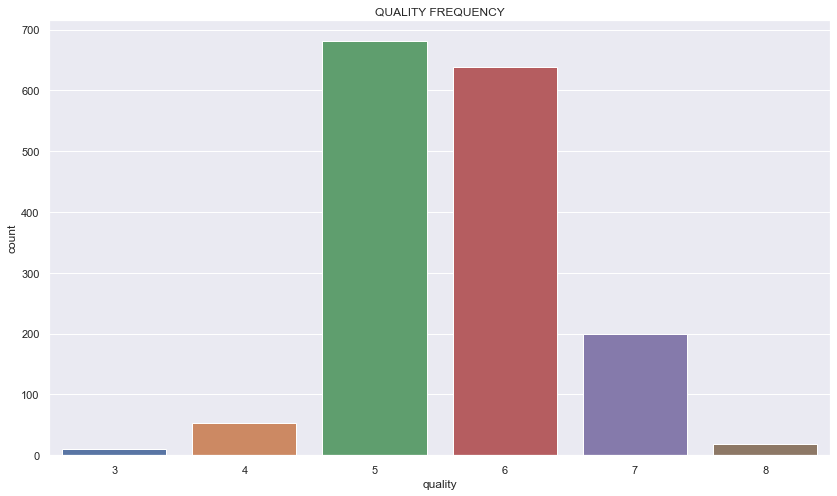

In [33]:
sns.set(rc={'figure.figsize': (14,8)})
sns.countplot(x = 'quality', data = df_red).set_title('QUALITY FREQUENCY')

plt.show()

Its looks like a Normal Distribution. The majority of red wine belongs to th group with quality labels 5 and 6, followed by the labels 7 and 4, and some of red wine belongs to the group with labels 3 and 8.

## Finding correlated columns

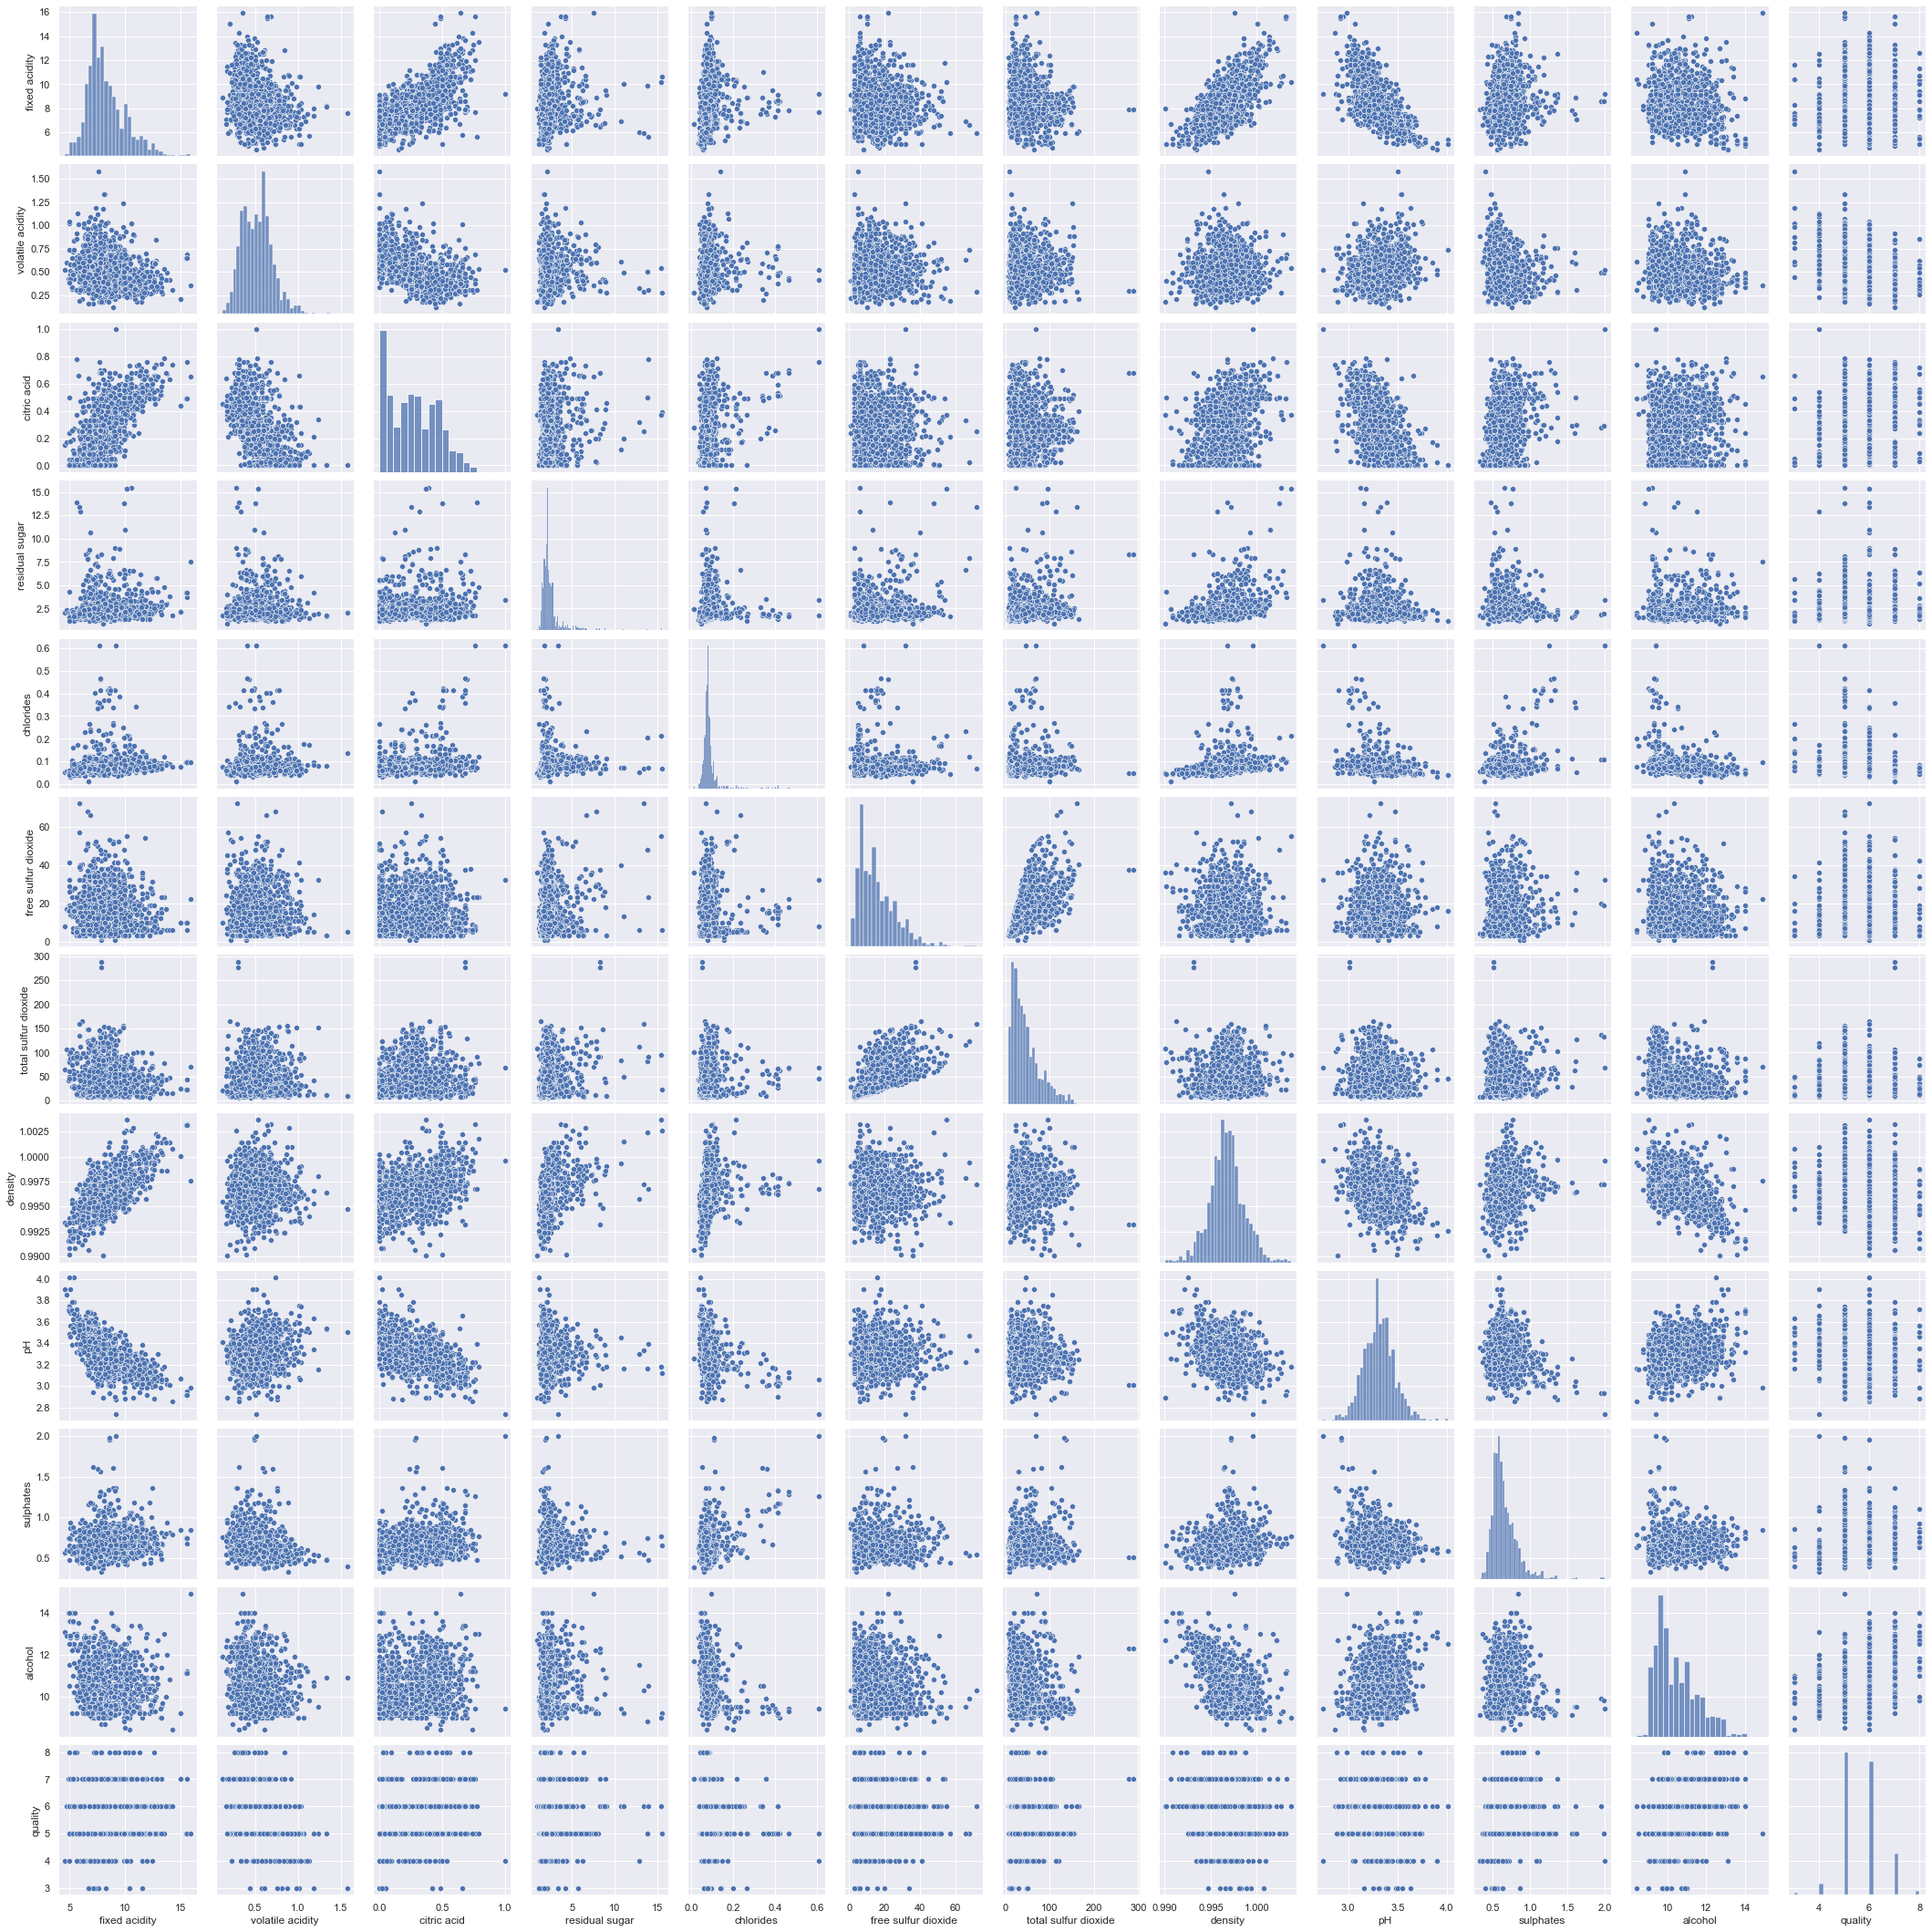

In [35]:
sns.pairplot(df_red)
plt.show()

The image above shows scattered plots for every possible combination pair of columns. The graph illustrates some positive correlation between fixed acidty and density. There is a negative corelation between alcohol percentage and density. There is a negative correlation of acidity with pH.

Let's quantify the correlation to better understand these correlations.

**Heatmap correlation**

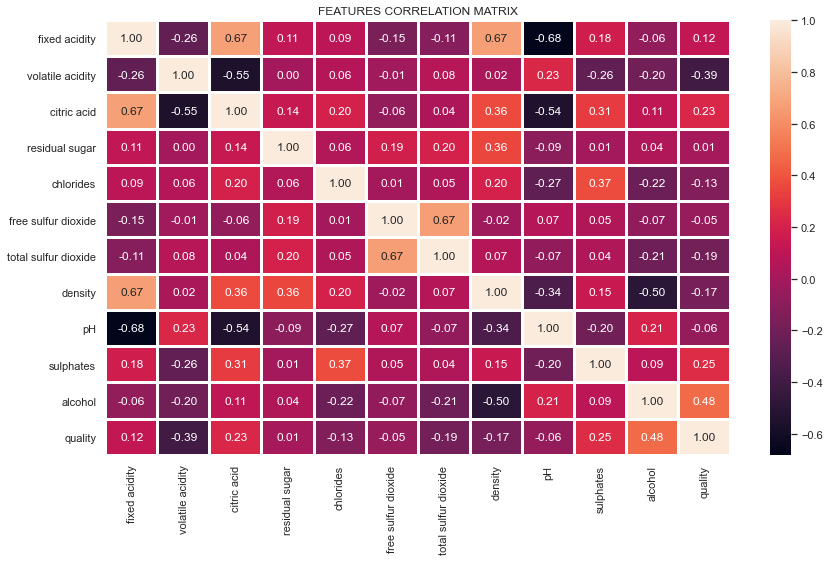

In [38]:
sns.heatmap(df_red.corr(), annot=True, fmt='.2f', linewidths=2).set_title('FEATURES CORRELATION MATRIX')
plt.show()

Since we focusing on **quality** column, the quality column has a positive correlation with alcohol, sulfates, residual sugar, citric acid and fixed acidity.

Let's see the alcohol distribution, the column with major correlation with alchol column.

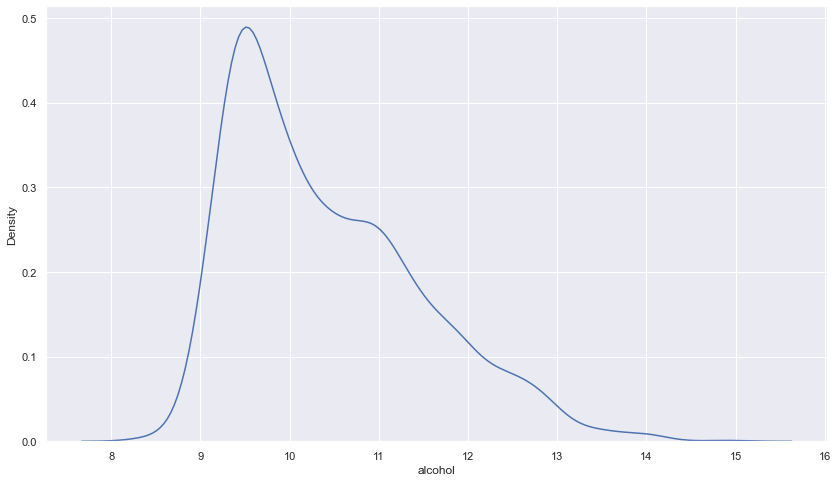

In [43]:
sns.kdeplot(df_red['alcohol'])
plt.show()

We can see taht alcohol distribution is positively skewed. We can check this using the `skew` method from scipy.stats.

In [45]:
skew(df_red['alcohol'])

0.8600210646566755

## Alcohol vs Quality